This is project is to predict the Salary of Developers in various countries. Features such as Country, Years of Experience, Educational background or level and its remote, hybrid or On-site role would be used to determine the salaries. This model can be instrumental to both developers seeking out opportunities and also for Hiring managers looking to get there next talent. 

This project is to improve my last Developer Salary prediction. The data used for this project is the StackOverFlow Developer Salary 2023. 

In [561]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [562]:
#import data 
df = pd.read_csv('/Users/mac/Desktop/projects/developer_salary_2023/survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


# Data Exploration

In [563]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [564]:
workplace = df[['ProfessionalTech', 'Industry']]
workplace.head(10)

,ProfessionalTech,Industry
0,NaN,NaN
1,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development..."
2,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development..."
3,Automated testing;Continuous integration (CI) ...,NaN
4,Microservices;Automated testing;Observability ...,Other
5,DevOps function;Microservices;Observability to...,Other
6,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development..."
7,None of these,Financial Services
8,NaN,NaN
9,NaN,NaN


In [565]:
knowledge_bais = df[['Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8']]
knowledge_bais.head(10)

,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree
2,Strongly agree,Neither agree nor disagree,Agree,Agree,Agree,Agree,Agree,Agree
3,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree
4,Agree,Strongly agree,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree
5,Agree,Strongly agree,Disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Disagree,Disagree
6,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,Neither agree nor disagree
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [566]:
check_values = df[['DevType','LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'MiscTechHaveWorkedWith']]
check_values.head(10)

,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,MiscTechHaveWorkedWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Senior Executive (C-Suite, VP, etc.)",HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Electron;React Native;Tauri
2,"Developer, back-end",Bash/Shell (all shells);Go,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,NaN
3,"Developer, front-end",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Homebrew;npm;Vite;Webpack;Yarn,NaN
4,"Developer, full-stack",HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Docker;npm;Webpack;Yarn,NaN
5,"Developer, back-end",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,NaN
6,"Developer, full-stack",Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Amazon Web Services (AWS);Digital Ocean,AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,RabbitMQ;Spring Framework
7,"Developer, full-stack",Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Dynamodb;MongoDB;MySQL;Redis;SQLite,Amazon Web Services (AWS);Fly.io;Netlify;Vercel,Angular;Express;Next.js;Node.js;React,Ansible;Cargo;Docker;Homebrew;Make;npm;Pip;pnp...,NumPy;Pandas;Scikit-Learn;Tauri;TensorFlow
8,System administrator,C#;JavaScript;PowerShell;Ruby;TypeScript,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Digital Ocean;Microsoft Azure;Netlify,ASP.NET CORE;Next.js;React;Ruby on Rails,Chocolatey;Docker;Homebrew;MSBuild;npm;NuGet;p...,.NET (5+)
9,"Developer, full-stack",HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,Cloud Firestore;MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Firebase;Google Clou...,Angular;Express;NestJS;React,Docker;npm;Vite;Webpack;Yarn,NaN


In [567]:
print(df.shape)

(89184, 84)


In [568]:
salary= df[['Country','CompTotal', 'ConvertedCompYearly']]
salary.head(20)

,Country,CompTotal,ConvertedCompYearly
0,NaN,NaN,NaN
1,United States of America,285000.0,285000.0
2,United States of America,250000.0,250000.0
3,United States of America,156000.0,156000.0
4,Philippines,1320000.0,23456.0
5,United Kingdom of Great Britain and Northern I...,78000.0,96828.0
6,United States of America,135000.0,135000.0
7,United States of America,80000.0,80000.0
8,Finland,60000.0,64254.0
9,India,NaN,NaN


In [569]:
required_info = df[['RemoteWork', 'EdLevel', 'Employment']]
required_info.head(40)

,RemoteWork,EdLevel,Employment
0,NaN,NaN,NaN
1,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
2,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
3,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
4,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr..."
5,Remote,Some college/university study without earning ...,"Employed, full-time"
6,Remote,Some college/university study without earning ...,"Employed, full-time"
7,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
8,"Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time"
9,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Not employed, but looking for work"


In [570]:
required_info.isnull().sum()

RemoteWork    15374
EdLevel        1211
Employment     1286
dtype: int64

In [571]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [572]:
df.shape

(89184, 84)

In [573]:
ai_data = df[['AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm',
       'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen',
       'AIToolInterested in Using', 'AIToolCurrently Using',
       'AIToolNot interested in Using', 'AINextVery different',
       'AINextNeither different nor similar', 'AINextSomewhat similar',
       'AINextVery similar', 'AINextSomewhat different', 'TBranch']]

ai_data.head(10)

,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,...,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",...,Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange;Stack Overflow f...,A few times per month or weekly,Yes,Less than once per month or monthly,Neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,"No, not really",I'm wearing of Stack Overflow using AI.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,ChatGPT,ChatGPT,NaN,NaN,Stack Overflow;Stack Exchange,A few times per week,No,NaN,Neutral,Using AI to suggest better answer to my questi...,...,Somewhat trust,Project planning;Testing code;Committing and r...,Learning about a codebase;Writing code;Documen...,NaN,NaN,NaN,NaN,NaN,NaN,Yes
5,ChatGPT;Google Bard AI;Neeva AI,NaN,GitHub Copilot;Tabnine,NaN,Stack Overflow,Daily or almost daily,Yes,I have never participated in Q&A on Stack Over...,"No, not at all",NaN,...,Somewhat trust,Learning about a codebase;Documenting code;Tes...,Writing code;Debugging and getting help,Project planning,NaN,NaN,NaN,NaN,NaN,Yes
6,ChatGPT,NaN,GitHub Copilot,NaN,Stack Overflow,A few times per month or weekly,Yes,Less than once per month or monthly,Neutral,Neutral,...,Somewhat distrust,NaN,Writing code;Debugging and getting help,Learning about a codebase;Project planning;Wri...,NaN,NaN,NaN,NaN,NaN,Yes
7,Bing AI;ChatGPT;Google Bard AI,ChatGPT;Neeva AI;Perplexity AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange;Collectives on S...,Daily or almost daily,Yes,A few times per month or weekly,"Yes, somewhat",NaN,...,Somewhat distrust,Project planning;Writing code;Documenting code...,Project planning;Writing code;Debugging and ge...,NaN,NaN,NaN,NaN,NaN,NaN,Yes
8,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,I have never participated in Q&A on Stack Over...,Neutral,To suggest solutions in alternative language f...,...,Somewhat trust,Learning about a codebase;Writing code;Documen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
9,Bing AI;ChatGPT,Bing AI;ChatGPT;Google Bard AI,AWS CodeWhisperer;GitHub Copilot;Tabnine,AWS CodeWhisperer;GitHub Copilot,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,Neutral,AI could assist solving communication issues p...,...,Neither trust nor distrust,Learning about a codebase;Documenting code;Com...,Writing code;Debugging and getting help,Project planning;Testing code;Deployment and m...,NaN,NaN,NaN,NaN,NaN,NaN


In [574]:
df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           67237
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I am learning to code                                                                     4961
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1211
Name: count, dtype: int64


We are interested in developers mostly

In [575]:

df = df[df['MainBranch'] == 'I am a developer by profession']
df.shape

(67237, 84)

In [576]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'India',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Lebanon', 'Lithuania', 'Serbia',
       'Cyprus', 'China', 'Bahrain', 'Iran, Islamic Republic of...',
       'Egypt', 'Poland', 'Russian Federation', 'Turkey', 'Slovakia',
       'Latvia', 'Greece', 'Austria', 'Denmark', 'Israel', 'Norway',
       'Hungary', 'Singapore', 'United Arab Emirates', 'Croatia',
       'Czech Republic', 'Kosovo', 'Finland', 'Nepal', 'Slovenia',
       'Romania', 'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine',
       'Kenya', 'Nomadic', 'Dominican Republic', 'Uzbekistan', 'Belarus',
       'Isle of Man', 'Estonia', 'Morocco', 'Bulgaria', 'Pakistan',
       'The former Yugoslav Republic of Macedon

In [577]:
df.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment                31
                       ...  
ProfessionalTech       28968
Industry               33538
SurveyLength            1119
SurveyEase              1097
ConvertedCompYearly    22883
Length: 84, dtype: int64

We are also interested in developers who are gainfully employed

In [578]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                   47441
Independent contractor, freelancer, or self-employed                                                                                                   5963
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3959
Not employed, but looking for work                                                                                                                     1301
Student, full-time                                                                                                                                     1281
                                                                                                                                                      ...  
Independent contractor, freelancer, or self-employed;

In [579]:
df = df[(df['Employment'] == 'Employed, full-time') | (df['Employment'] == 'Independent contractor, freelancer, or self-employed') | (df['Employment'] == 'Employed, full-time;Independent contractor, freelancer, or self-employed')]

In [580]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Lebanon', 'Lithuania', 'Serbia',
       'Cyprus', 'India', 'Iran, Islamic Republic of...', 'Egypt',
       'Poland', 'Russian Federation', 'Turkey', 'Latvia', 'Austria',
       'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Finland', 'Nepal', 'Slovenia', 'China', 'Romania', 'Greece',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Nomadic',
       'Dominican Republic', 'Uzbekistan', 'Belarus', 'Isle of Man',
       'Estonia', 'Morocco', 'Bulgaria', 'Pakistan',
       'The former Yugoslav Republic of Macedonia', 'Luxembourg',
       'Indon

In [581]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed'],
      dtype=object)

Drop columns that are not useful for exploration 
This is a simple task, but it's important to remove any column that doesn't contribute meaningfully to the analysis.

In [582]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [583]:
df= df.drop(columns=['ResponseId', 'Q120', 'MainBranch', 'CompTotal', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm','AINextVery different',
       'AINextNeither different nor similar', 'AINextSomewhat similar',
       'AINextVery similar', 'AINextSomewhat different', 'TimeSearching',
       'TimeAnswering', 'ProfessionalTech', 'SurveyLength',
       'SurveyEase', 'AISearchHaveWorkedWith','AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'SOAI', 'AIToolInterested in Using', 'AIToolCurrently Using',
       'AIToolNot interested in Using', 'Knowledge_1', 'Knowledge_2',
       'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6',
       'Knowledge_7', 'Knowledge_8', 'Frequency_1', 'Frequency_2',
       'Frequency_3'])

In [584]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Lebanon', 'Lithuania', 'Serbia',
       'Cyprus', 'India', 'Iran, Islamic Republic of...', 'Egypt',
       'Poland', 'Russian Federation', 'Turkey', 'Latvia', 'Austria',
       'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Finland', 'Nepal', 'Slovenia', 'China', 'Romania', 'Greece',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Nomadic',
       'Dominican Republic', 'Uzbekistan', 'Belarus', 'Isle of Man',
       'Estonia', 'Morocco', 'Bulgaria', 'Pakistan',
       'The former Yugoslav Republic of Macedonia', 'Luxembourg',
       'Indon

In [585]:
df['DevType'].isna().sum()

171

In [586]:
df.shape

(57363, 46)

In [587]:
# rename ConvertedCompYearly to Salary 
df = df.rename(columns={'ConvertedCompYearly': 'Salary'})

In [588]:
df['Salary'].isnull().sum()

14341

In [589]:
df.shape

(57363, 46)

<Axes: >

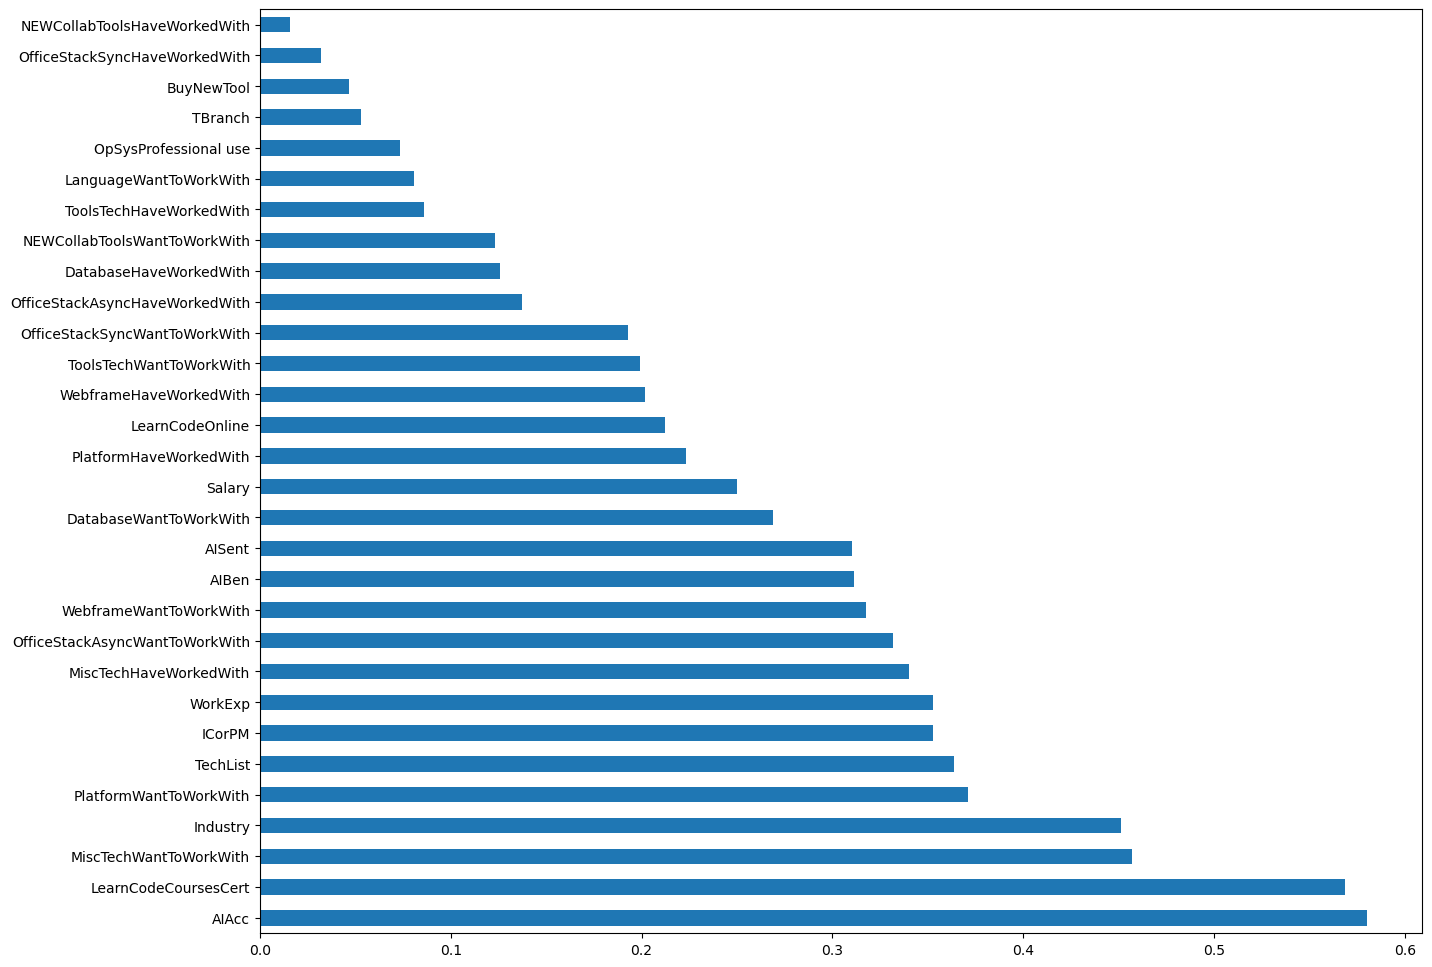

In [590]:
pct_nas = df.isna().sum() / df.shape[0]

pct_nas.sort_values(ascending=False)[:30].plot(kind='barh', figsize=(15, 12))

In [591]:

df.head()

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OfficeStackSyncWantToWorkWith,AISelect,AISent,AIAcc,AIBen,TBranch,ICorPM,WorkExp,Industry,Salary
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,...,Discord;Signal;Slack;Zoom,Yes,Indifferent,Other (please explain),Somewhat distrust,Yes,People manager,10.0,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,...,Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,23.0,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,...,Discord;Google Meet;Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,7.0,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,...,Discord;Google Meet;Slack;Zoom,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Yes,Individual contributor,6.0,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,...,NaN,Yes,Favorable,Greater efficiency,Somewhat trust,Yes,Individual contributor,22.0,Other,96828.0


In [592]:
df.columns

Index(['Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList',
       'BuyNewTool', 'Country', 'Currency', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISelect', 'AISent', 'AIAcc', 'AIBen',
       'TBranch', 'ICorPM', 'WorkExp', 'Industry', 'Salary'],

In [593]:
df[['AISelect', 'AISent', 'AIAcc', 'AIBen']]

,AISelect,AISent,AIAcc,AIBen
1,Yes,Indifferent,Other (please explain),Somewhat distrust
2,"No, and I don't plan to",NaN,NaN,NaN
3,"No, and I don't plan to",NaN,NaN,NaN
4,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
5,Yes,Favorable,Greater efficiency,Somewhat trust
...,...,...,...,...
89175,Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
89177,"No, but I plan to soon",Indifferent,NaN,Neither trust nor distrust
89178,"No, but I plan to soon",Favorable,NaN,Somewhat distrust
89179,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust


In [594]:
# df[['Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4','Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',]]

In [595]:
df.head()

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OfficeStackSyncWantToWorkWith,AISelect,AISent,AIAcc,AIBen,TBranch,ICorPM,WorkExp,Industry,Salary
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,...,Discord;Signal;Slack;Zoom,Yes,Indifferent,Other (please explain),Somewhat distrust,Yes,People manager,10.0,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,...,Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,23.0,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,...,Discord;Google Meet;Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,7.0,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,...,Discord;Google Meet;Slack;Zoom,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Yes,Individual contributor,6.0,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,...,NaN,Yes,Favorable,Greater efficiency,Somewhat trust,Yes,Individual contributor,22.0,Other,96828.0


# Data Cleaning

In [596]:
len(df['Country'])

57363

<Axes: >

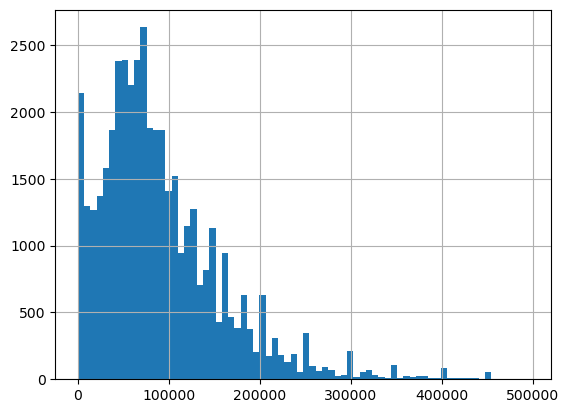

In [597]:

df[df.Salary < 500000].Salary.hist(bins='scott')

In [598]:
len(df['Country'])

57363

In [599]:
df['RemoteWork'].unique()

array(['Remote', 'Hybrid (some remote, some in-person)', 'In-person', nan],
      dtype=object)

In [600]:
df.loc[df['RemoteWork'] == 'Hybrid (some remote, some in-person)', 'RemoteWork'] = 'Hybrid'

In [601]:
df['RemoteWork'].isnull().sum()

7

In [602]:
df['RemoteWork'].value_counts()

RemoteWork
Remote       25215
Hybrid       23921
In-person     8220
Name: count, dtype: int64

In [603]:
len(df['Country'])

57363

In [604]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Something else'],
      dtype=object)

In [605]:
df['EdLevel'].isnull().sum()

0

In [606]:
# def edu(x):
#     if 'Bachelor’s degree 'in x:
#         return 'Bachelors degree'
#     elif 'Master’s degree' in x:
#         return 'Masters degree'
#     elif "Professional degree" in x:
#         return 'Doctorate Degree'
#     else:
#         return "Less than Bachelors"
    
# df['EdLevel'] = df['EdLevel'].apply(edu)

In [607]:
len(df['Country'])

57363

In [608]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Something else'],
      dtype=object)

In [701]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'Research & Development role', 'Database administrator',
       'Developer, embedded applications or devices',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Security professional', 'Academic researcher',
       'System administrator', 'Other (please specify):',
       'Developer, QA or test', 'Developer Experience',
       'Engineering manager',
       'Data scientist or machine learning specialist',
       'Developer, mobile', 'DevOps specialist',
       'Engineer, site reliability', 'Data or business analyst',
       'Cloud infrastructure engineer', 'Blockchain', 'Product manager',
       'Developer, game or graphics', 'Developer Advocate',
       'Project manager', 'Hardware Engineer', 'Scientist',
       'Marketing or sales professional', 'Designer', nan, 'Student',
       'Educator'], dtype=object)

In [702]:
def cleandev(x):
    if 'back-end' in x:
        return 'Backend Developer'
    elif 'front-end' in x:
        return 'Frontend Developer'
    elif 'full-stack' in x:
        return 'Fullstack Developer'
    elif 'QA' in x:
        return 'QA Tester'
    elif 'Designer' in x:
        return 'Designer'
    elif 'Data scientist' in x:
        return 'Data Scientist'
    elif 'Research & Development role' in x:
        return 'Research & Development'
    elif 'System admininstrator' in x:
        return 'System Admin'
    elif 'mobile' in x:
        return 'Mobile Developer'
    elif 'embedded applications or devices' in x:
        return 'Embedded Systems Engineer'
    elif 'desktop or enterprise applications' in x:
        return 'Enterprise/Desktop Engineer'
    elif 'Academic researcher' in x:
        return 'Academic Researcher'
    elif 'Cloud infrastructure engineer' in x:
        return 'Cloud Engineer'
    elif 'Developer Experience' in x:
        return 'Developer Experience'
    elif 'Engineering manager' in x:
        return 'Engineering manager'
    elif 'Engineer, data' in x:
        return 'Data Engineer'
    elif 'DevOps specialist' in x:
        return 'DevOps Engineer'
    elif 'Database administrator' in x:
        return 'Database Administrator'
    elif 'site reliability' in x:
        return 'Site Reliability Engineer'
    elif 'Data or business analyst' in x:
        return 'Data Analyst'
    elif 'Blockchain' in x:
        return 'Blockchain Developer'
    elif 'game or graphics' in x:
        return 'Game Developer'
    elif 'Security professional' in x:
        return 'Security'
    elif 'Developer Advocate' in x:
        return 'Developer Advocate'
    elif 'Product manager' in x:
        return 'Product Manager'
    elif 'Project manager' in x:
        return 'Project Manager'
    elif 'Hardware Engineer' in x:
        return x
    elif 'Scientist' in x:
        return x
    elif 'Marketing' in x:
        return x
    else:
        return x
    

df['DevType']= df['DevType'].apply(cleandev)

# # 'Product manager', 'Project manager',
#        'Hardware Engineer', 'Scientist',
#        'Marketing or sales professional', 'Educator', 'Student'

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/mac/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5m/3fqmnj9x6yg0_7b6pc8y_12m0000gn/T/ipykernel_1421/2517557598.py", line 64, in <module>
    df['DevType']= df['DevType'].apply(cleandev)
  File "/Users/mac/anaconda3/lib/python3.10/site-packages/pandas/core/series.py", line 4630, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
  File "/Users/mac/anaconda3/lib/python3.10/site-packages/pandas/core/apply.py", line 1025, in apply
    return self.apply_standard()
  File "/Users/mac/anaconda3/lib/python3.10/site-packages/pandas/core/apply.py", line 1076, in apply_standard
    mapped = lib.map_infer(
  File "pandas/_libs/lib.pyx", line 2834, in pandas._libs.lib.map_infer
  File "/var/folders/5m/3fqmnj9x6yg0_7b6pc8y_12m0000gn/T/ipykernel_1421/2517557598.py", line 2, in cleandev
    if 'bac

In [611]:
# df['DevType'].unique()

In [612]:
# # since we are focusing on developers
# # we would remove non-developers role
# for index, row in df.iterrows():
#     if 'Senior Executive (C-Suite, VP, etc.)' in row['DevType']:
#         df.drop(index, inplace=True)

In [613]:
# for index, row in df.iterrows():
#     if 'Marketing or sales professional' in row['DevType'] or 'Other (please specify)' in row['DevType'] or 'Student' in row['DevType'] or 'Educator' in row['DevType']:
#         df.drop(index, inplace=True)

In [614]:
# for index, row in df.iterrows():
#     if 'Scientist' ==  row['DevType']:
#         df.drop(index, inplace=True)

In [615]:
# df['DevType'].value_counts()

In [616]:
# df['DevType'].unique()

In [617]:
# df.head()

In [618]:
df['Country'].value_counts()

Country
United States of America                                12997
Germany                                                  4407
United Kingdom of Great Britain and Northern Ireland     3938
India                                                    3404
Canada                                                   2395
                                                        ...  
Guinea-Bissau                                               1
Sierra Leone                                                1
Angola                                                      1
Timor-Leste                                                 1
Saint Vincent and the Grenadines                            1
Name: count, Length: 177, dtype: int64

In [619]:
len(df['Country'])

57363

In [620]:
# we can see some countries have very few representatives and others have more
# group countries with range of number of developers together
def shorten_categories(categories, cutoff):
    categorical_map = {}
    # cutoff number we can play around with
    for i in range(len(categories)):
      # for country count_value equal or greater than the cutoff, keep
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
          # otherwise group them as 'Other'
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
     


In [621]:
country_map = shorten_categories(df.Country.value_counts(), 45)
df['Country']= df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                12997
Germany                                                  4407
United Kingdom of Great Britain and Northern Ireland     3938
India                                                    3404
Canada                                                   2395
                                                        ...  
Luxembourg                                                 56
Ecuador                                                    51
Tunisia                                                    46
Dominican Republic                                         46
Saudi Arabia                                               46
Name: count, Length: 81, dtype: int64

In [622]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France', 'Other',
       'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy', 'Brazil',
       'Portugal', 'Bangladesh', 'Canada', 'Argentina', 'Switzerland',
       'Sri Lanka', 'Lithuania', 'Serbia', 'Cyprus', 'India',
       'Iran, Islamic Republic of...', 'Egypt', 'Poland',
       'Russian Federation', 'Turkey', 'Latvia', 'Austria', 'Denmark',
       'Israel', 'Norway', 'Hungary', 'Singapore', 'United Arab Emirates',
       'Croatia', 'Czech Republic', 'Finland', 'Nepal', 'Slovenia',
       'China', 'Romania', 'Greece', 'Tunisia', 'Republic of Korea',
       'Viet Nam', 'Ukraine', 'Dominican Republic', 'Belarus', 'Estonia',
       'Morocco', 'Bulgaria', 'Pakistan', 'Luxembourg', 'Indonesia',
       'Ireland', 'Georgia', 'Japan',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Armenia',
       'Bosnia

In [623]:
len(df['Country'])

57363

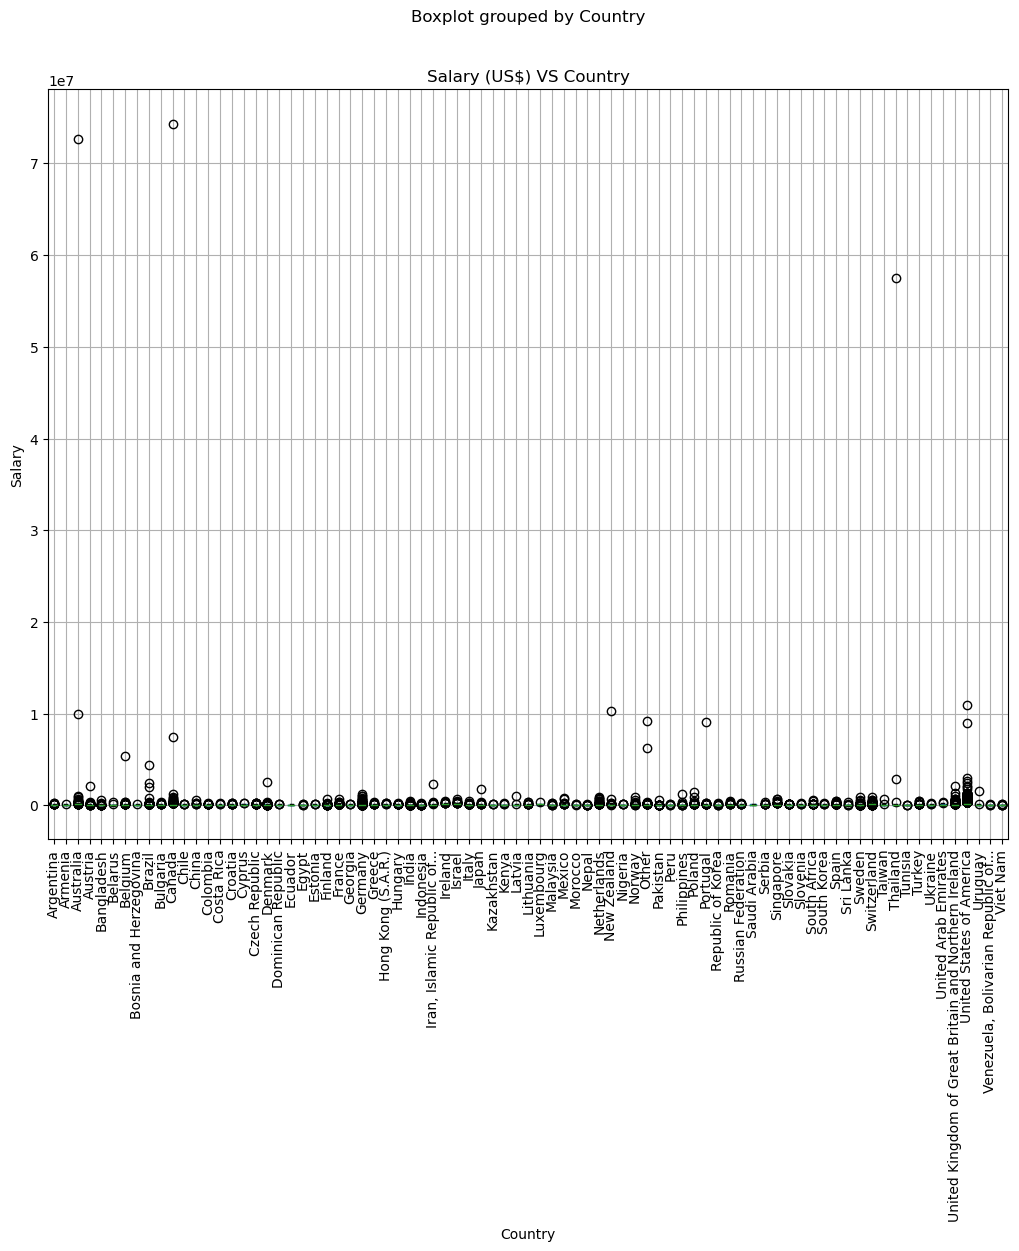

<Figure size 640x480 with 0 Axes>

In [624]:
# check salary range using boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (US$) VS Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation =90)
plt.show()
plt.tight_layout()

Q3 is less than $500000 which is the median of upper half
also the above plot shows the outliers start from below $100000
and we want to get the median of the salary Salary less than or equal to $500000.



Also, we would drop Others in the Country column

In [625]:

df = df[(df['Salary'] >= 5000) & (df['Salary'] <= 500000)]


# drop Others
df = df[df['Country'] != 'Other']

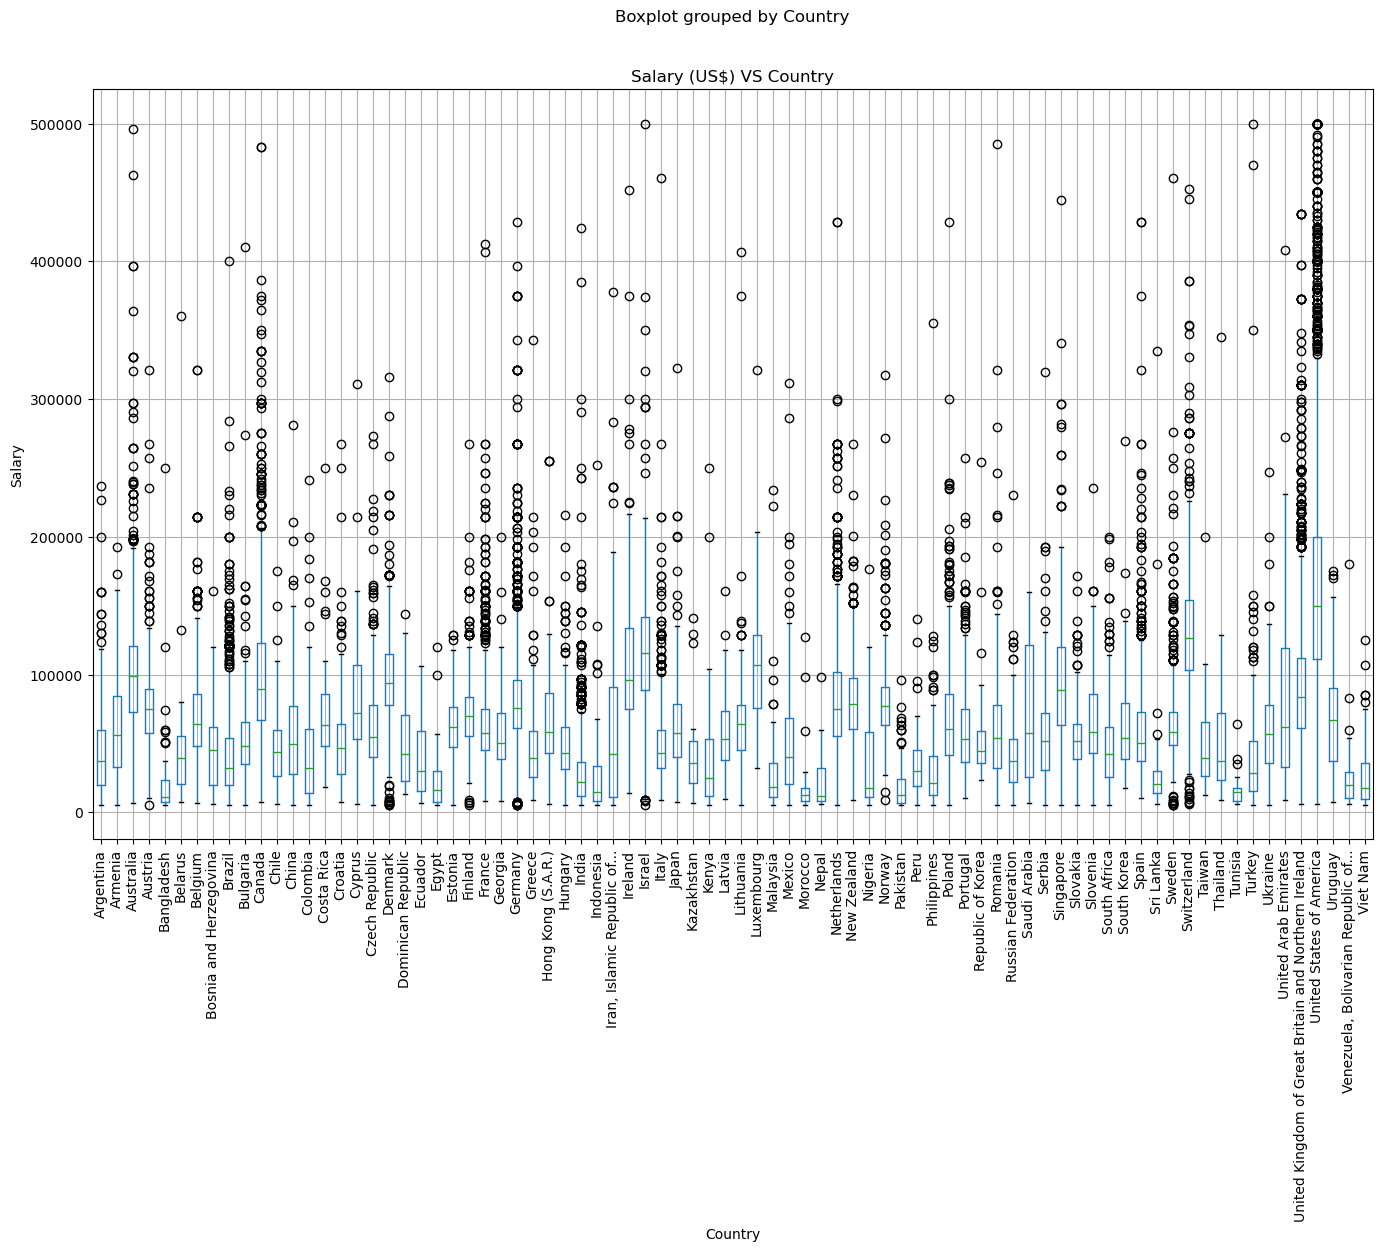

<Figure size 640x480 with 0 Axes>

In [626]:
fig, ax = plt.subplots(1,1, figsize=(16, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (US$) VS Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation =90)
plt.show()
plt.tight_layout()

<Axes: >

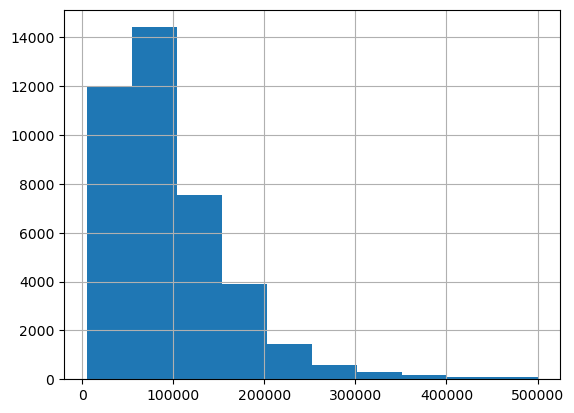

In [627]:
df['Salary'].hist()

For Linear regression, we have to transform the Salary column to achieve optimum result. The target is to have our data normally distributed. 

<Axes: >

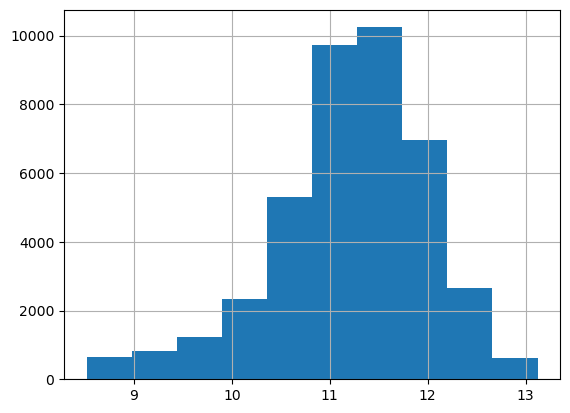

In [628]:
np.log(df['Salary']).hist()

From the salary and country boxplot, we notice some misspellings in the country data. We would change that below

In [629]:

df.loc[df['Country'] == 'Viet Nam', 'Country'] = 'Vietnam' 
df.loc[df['Country'] == 'Hong Kong (S.A.R.)', 'Country'] = 'China'
df.loc[df['Country'] == 'Iran, Islamic Republic of...', 'Country'] = 'Iran'
df.loc[df['Country'] == 'Venezuela, Bolivarian Republic of...', 'Country'] = 'Venezuela'

In [630]:
df['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '10', '2', '6', '14', '15', '5',
       '16', '28', '30', '11', '8', '24', '40', '25', '12', '20', '18',
       '19', '27', '17', 'Less than 1 year', '43', '26', '1', '38', '13',
       '33', '29', '22', nan, '31', '34', '32', '37', '42', '36', '39',
       '35', '41', '44', '50', '48', 'More than 50 years', '45', '46',
       '47', '49'], dtype=object)

In [631]:
df['YearsCodePro'].isnull().sum()

132

In [632]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 51
    elif x == 'Less than 1 year':
        return 0.5
    else:
        return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [633]:
df['YearsCodePro'].unique()

array([ 9. , 23. ,  7. ,  4. , 21. ,  3. , 10. ,  2. ,  6. , 14. , 15. ,
        5. , 16. , 28. , 30. , 11. ,  8. , 24. , 40. , 25. , 12. , 20. ,
       18. , 19. , 27. , 17. ,  0.5, 43. , 26. ,  1. , 38. , 13. , 33. ,
       29. , 22. ,  nan, 31. , 34. , 32. , 37. , 42. , 36. , 39. , 35. ,
       41. , 44. , 50. , 48. , 51. , 45. , 46. , 47. , 49. ])

In [634]:
df.head()

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OfficeStackSyncWantToWorkWith,AISelect,AISent,AIAcc,AIBen,TBranch,ICorPM,WorkExp,Industry,Salary
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9.0,...,Discord;Signal;Slack;Zoom,Yes,Indifferent,Other (please explain),Somewhat distrust,Yes,People manager,10.0,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time",Hybrid,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23.0,...,Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,23.0,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time",Hybrid,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7.0,...,Discord;Google Meet;Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,7.0,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4.0,...,Discord;Google Meet;Slack;Zoom,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Yes,Individual contributor,6.0,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21.0,...,NaN,Yes,Favorable,Greater efficiency,Somewhat trust,Yes,Individual contributor,22.0,Other,96828.0


In [635]:
df.shape

(40560, 46)

In [636]:
df.head()

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OfficeStackSyncWantToWorkWith,AISelect,AISent,AIAcc,AIBen,TBranch,ICorPM,WorkExp,Industry,Salary
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9.0,...,Discord;Signal;Slack;Zoom,Yes,Indifferent,Other (please explain),Somewhat distrust,Yes,People manager,10.0,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time",Hybrid,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23.0,...,Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,23.0,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time",Hybrid,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7.0,...,Discord;Google Meet;Slack;Zoom,"No, and I don't plan to",NaN,NaN,NaN,Yes,Individual contributor,7.0,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4.0,...,Discord;Google Meet;Slack;Zoom,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Yes,Individual contributor,6.0,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21.0,...,NaN,Yes,Favorable,Greater efficiency,Somewhat trust,Yes,Individual contributor,22.0,Other,96828.0


In [637]:
df.shape

(40560, 46)

In [638]:
df['Salary'].isna().sum()

0

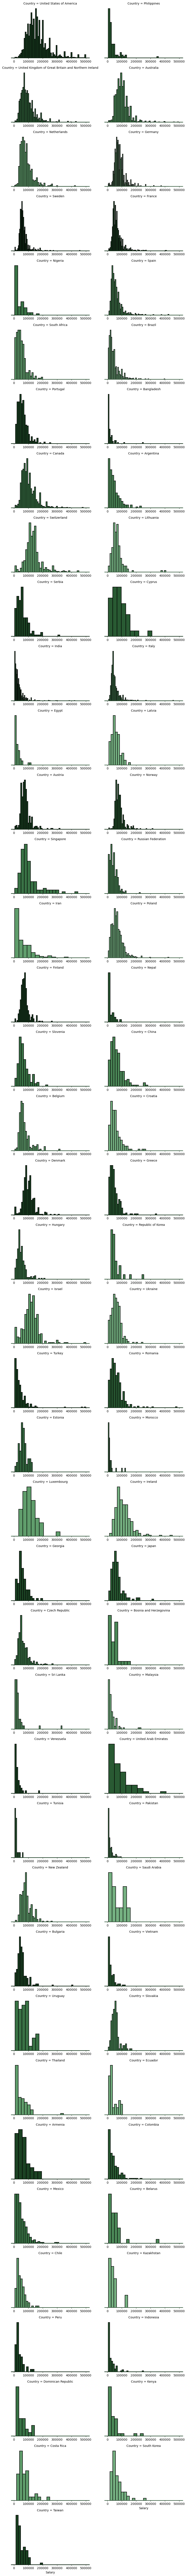

In [639]:

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(6, start=2, rot=0, dark=.2, light=.6, reverse=True)

# sns.cubehelix_palette(6, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
g = sns.FacetGrid(df, sharey=False, col="Country", hue="Country", col_wrap = 2, aspect=1.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.histplot, "Salary", common_bins=False, fill=True, alpha=1, linewidth=1.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


# g.map(label, "ConvertedCompYearly")

# Set the subplots to overlap
# g.figure.subplots_adjust()

# Remove axes details that don't play well with overlap
# g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
# plt.tight_layout()

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)


In [640]:
df['YearsCodePro'].isna().sum()

132

<Axes: xlabel='YearsCodePro'>

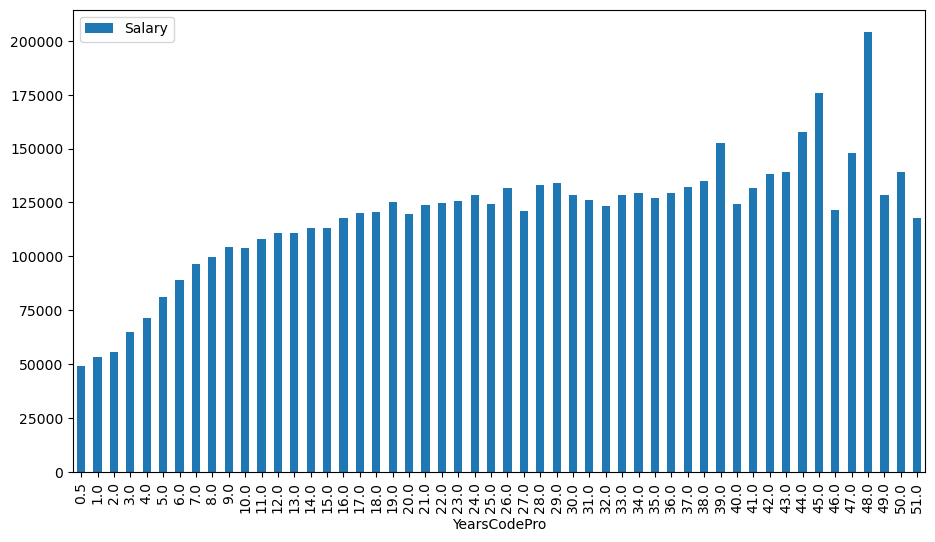

In [641]:
filter_year_code_pro = ~df['YearsCodePro'].isna()
df[filter_year_code_pro].groupby('YearsCodePro')['Salary'].mean().to_frame().plot(kind='bar', figsize=(11, 6))

<Axes: ylabel='Country'>

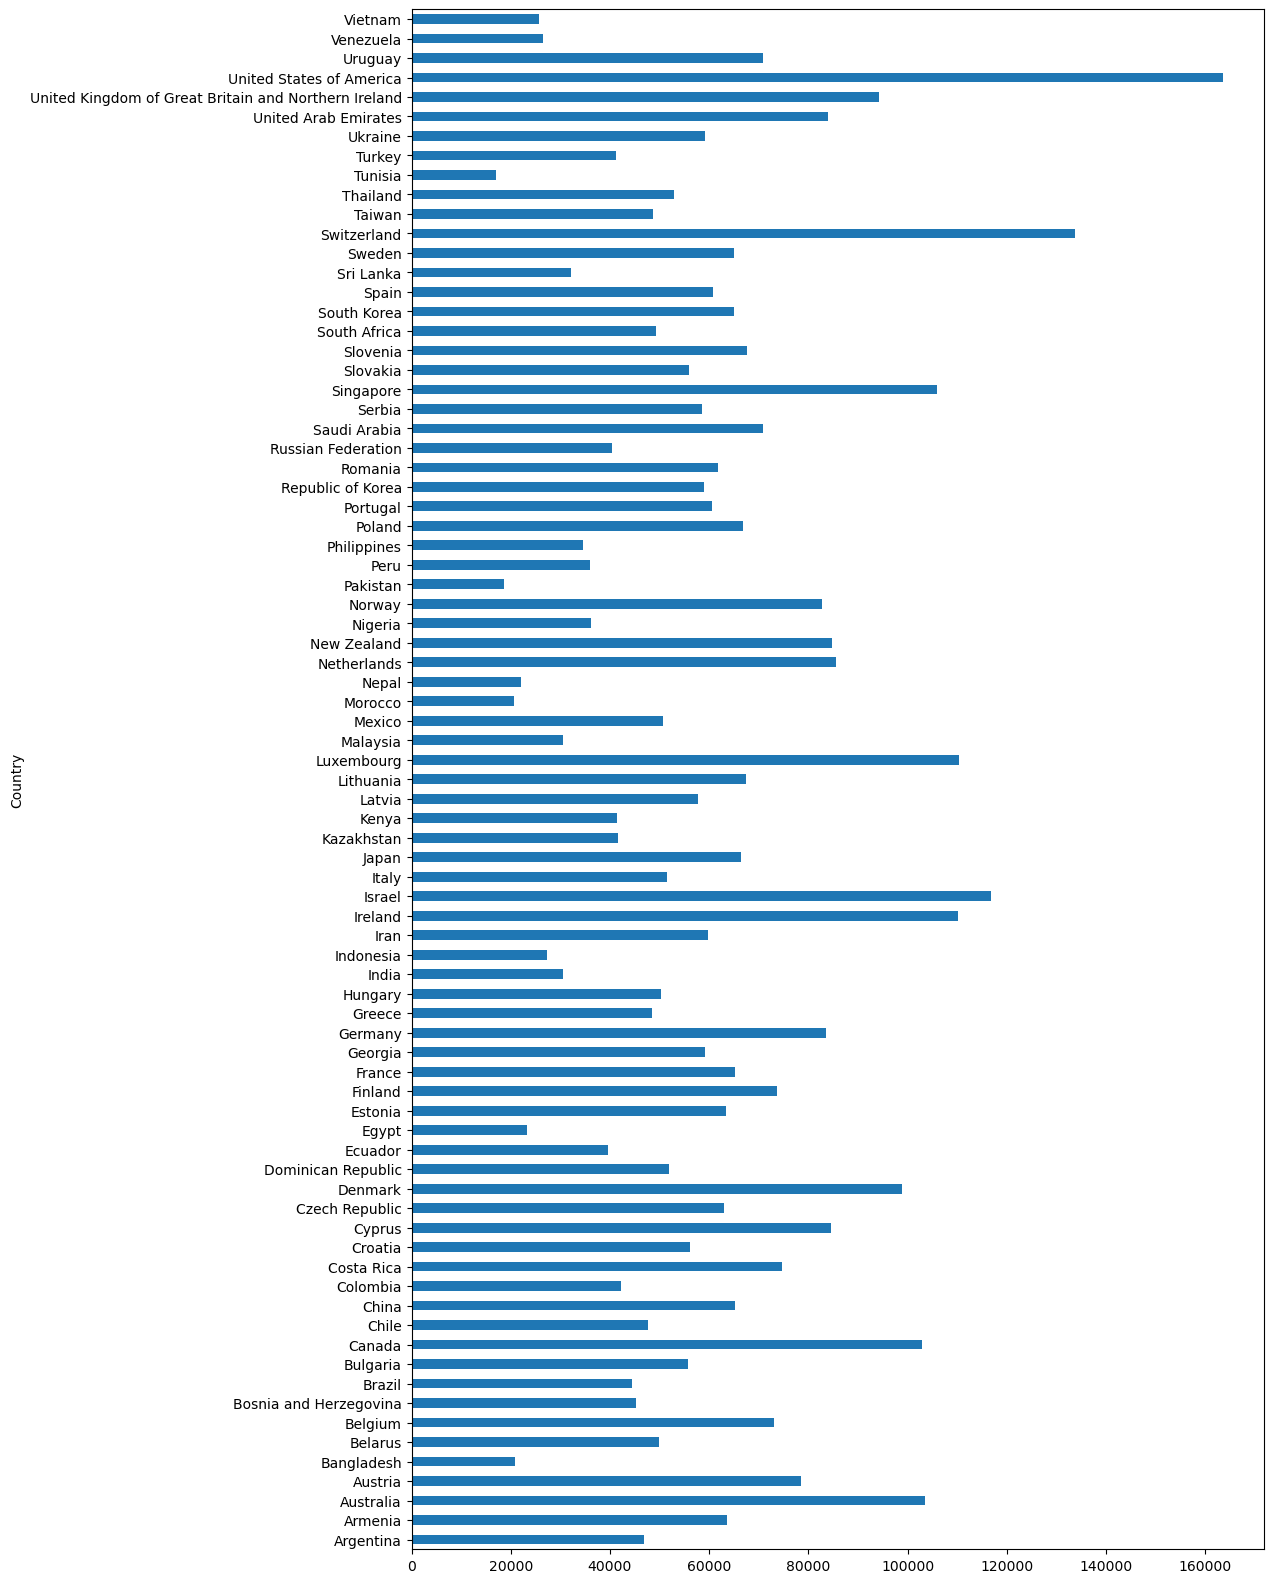

In [642]:
df.groupby('Country')['Salary'].mean().plot(kind='barh', figsize=(11,20))

/var/folders/5m/3fqmnj9x6yg0_7b6pc8y_12m0000gn/T/ipykernel_1421/436180869.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.barh(mean_salary_by_country.index, mean_salary_by_country, color=plt.cm.get_cmap("tab20").colors)


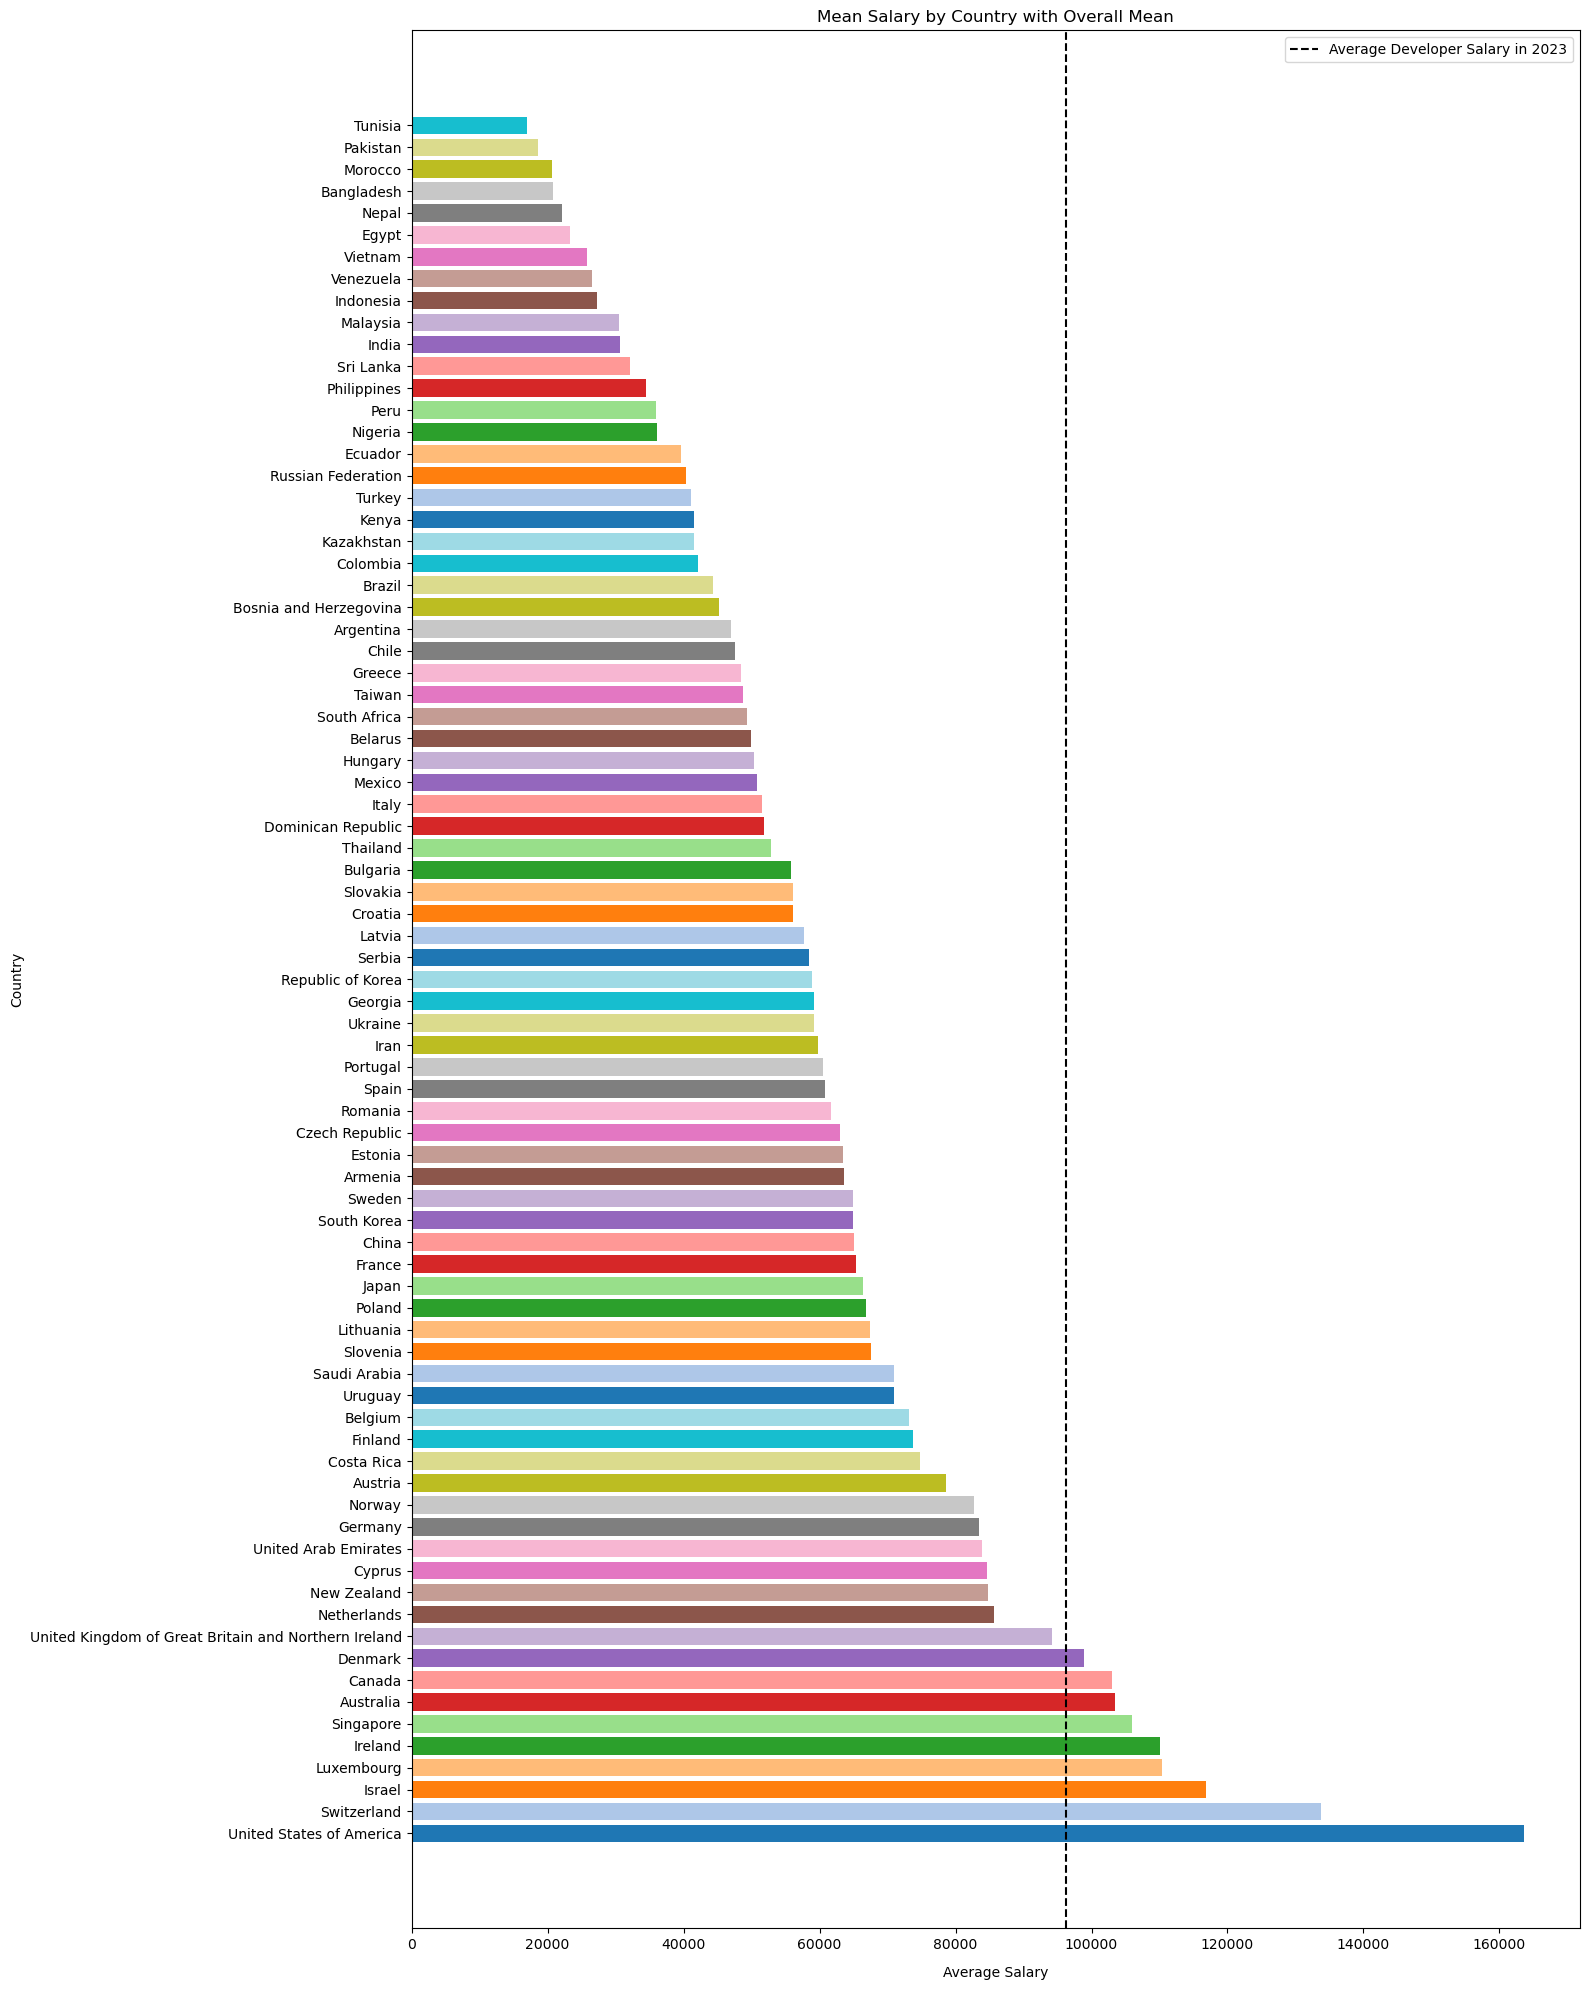

In [643]:
mean_salary = df["Salary"].mean()

# Calculate mean salary for each country
mean_salary_by_country = df.groupby("Country")["Salary"].mean().sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(16, 20))
plt.barh(mean_salary_by_country.index, mean_salary_by_country, color=plt.cm.get_cmap("tab20").colors)

# Add a vertical line for the mean salary
plt.axvline(mean_salary, color="black", linestyle="--", label="Average Developer Salary in 2023")

# Customize the plot
plt.xlabel("Average Salary", labelpad=10)
plt.ylabel("Country")
plt.title("Mean Salary by Country with Overall Mean")
plt.legend()
plt.tight_layout()
plt.show()

In [678]:
df.shape

(40560, 46)

## What does Salary by Education look like

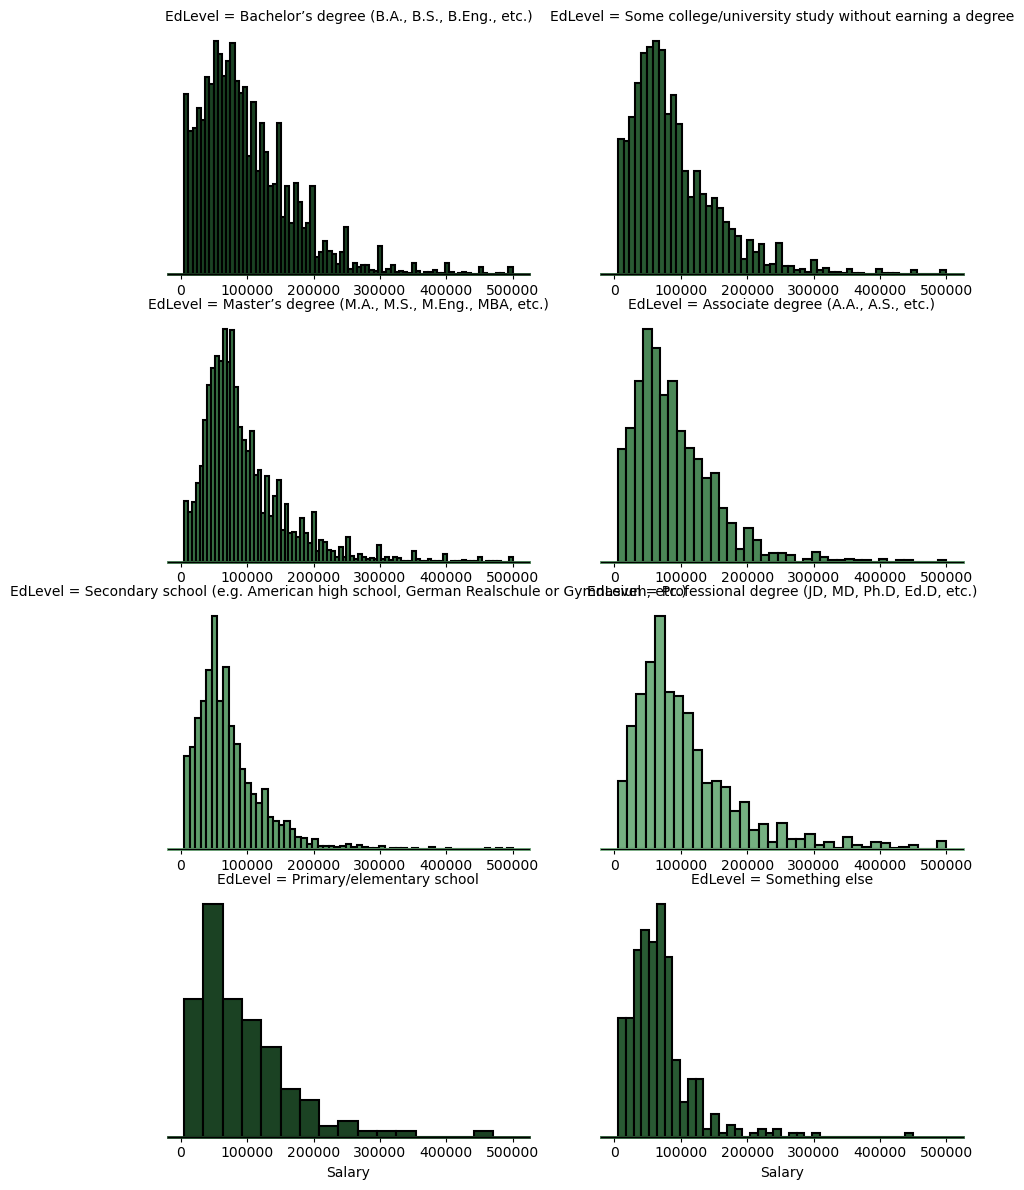

In [684]:

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(6, start=2, rot=0, dark=.2, light=.6, reverse=True)

# sns.cubehelix_palette(6, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
g = sns.FacetGrid(df, sharey=False, col="EdLevel", hue="EdLevel", col_wrap = 2, aspect=1.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.histplot, "Salary", common_bins=False, fill=True, alpha=1, linewidth=1.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


# g.map(label, "ConvertedCompYearly")

# Set the subplots to overlap
# g.figure.subplots_adjust()

# Remove axes details that don't play well with overlap
# g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
# plt.tight_layout()

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)


<Axes: ylabel='EdLevel'>

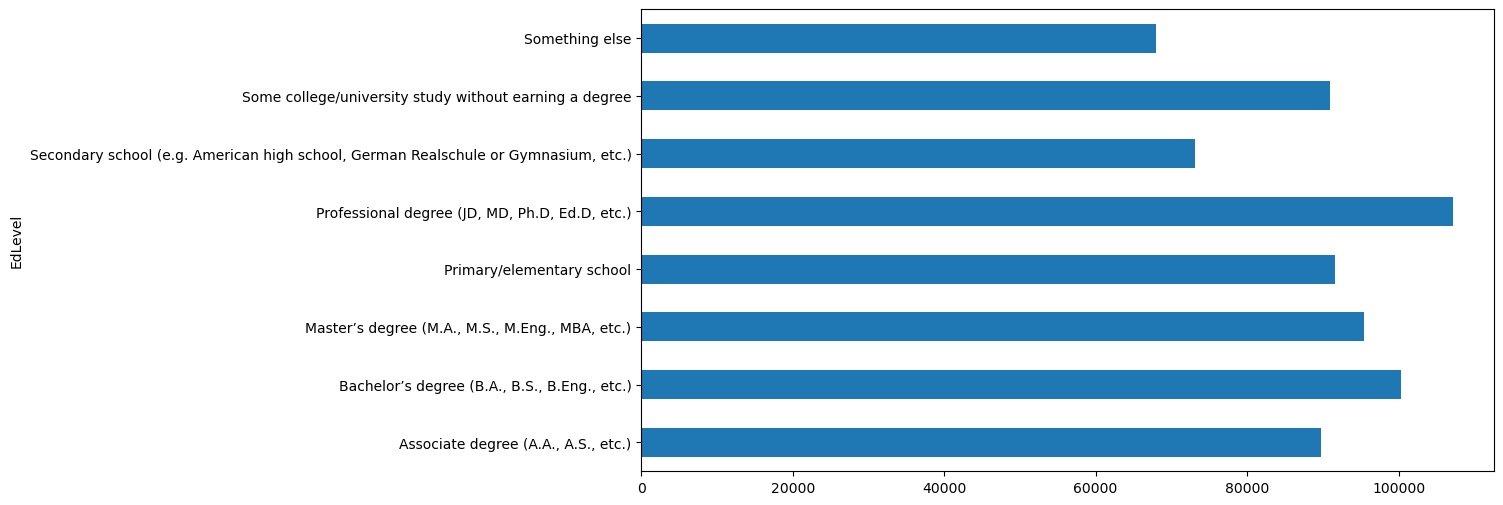

In [685]:
df.groupby('EdLevel')['Salary'].mean().plot(kind='barh', figsize=(11, 6))

## Do more programming language a developer is able to write mean more salary?

In [686]:
df['LanguageHaveWorkedWith'].isna().sum()

94

In [687]:
df['LanguageHaveWorkedWith'].unique()

array(['HTML/CSS;JavaScript;Python', 'Bash/Shell (all shells);Go',
       'Bash/Shell (all shells);HTML/CSS;JavaScript;PHP;Ruby;SQL;TypeScript',
       ..., 'Bash/Shell (all shells);C;C++;JavaScript;Julia',
       'C;C#;C++;HTML/CSS;Java;Kotlin;MATLAB;Objective-C;SQL;Swift;Visual Basic (.Net)',
       'Assembly;Bash/Shell (all shells);C;C#;C++;JavaScript;MATLAB;PowerShell;SAS;Solidity;TypeScript'],
      dtype=object)

In [692]:
# filter_language = ~df['LanguageHaveWorkedWith'].isna()
df['language_len'] = df['LanguageHaveWorkedWith'].str.split(';').str.len()
df['many_lang'] = np.where(df['language_len'] > 10, 1, 0)
# if more than 10, lets tag all as 11
df['language_len'] = np.where(df['language_len'] > 10, 11, df['language_len'])

In [693]:
df['language_len']

1         3.0
2         2.0
3         7.0
4         3.0
5         6.0
         ... 
89162     2.0
89166    11.0
89167     4.0
89170     6.0
89171     3.0
Name: language_len, Length: 40560, dtype: float64

<Axes: xlabel='language_len'>

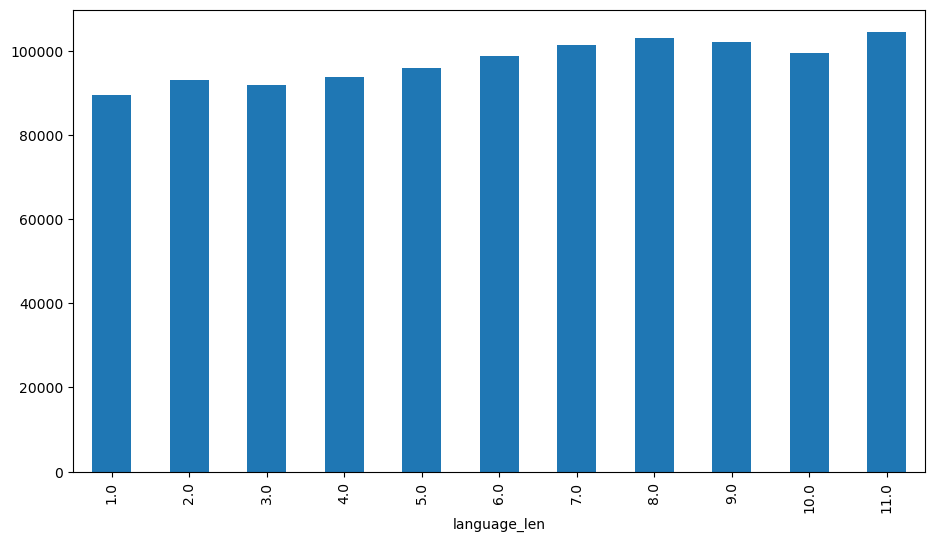

In [694]:
df.groupby('language_len')['Salary'].mean().plot(kind='bar', figsize=(11,6))

## AI Effect 

In [695]:
df.groupby('AISent')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
AISent,,,,,,,,
Favorable,13561.0,92071.186343,68472.041611,5000.0,46263.00,74963.0,120000.0,500000.0
Indifferent,4609.0,96855.459536,68217.168083,5000.0,51403.00,80317.0,128507.0,500000.0
Unfavorable,773.0,101333.382924,73954.379553,5140.0,53545.00,80317.0,135919.0,500000.0
Unsure,914.0,88869.215536,63404.825012,5065.0,45076.50,74963.0,120000.0,500000.0
Very favorable,7738.0,94569.205092,71869.981829,5000.0,45494.00,76549.5,125000.0,500000.0
Very unfavorable,110.0,93857.372727,64299.476167,6058.0,47386.75,84775.5,120000.0,315000.0


People who are unfavourable to AI tools for developement processes tend to make more on average. Does this mean more experienced developers are not buying the hype

In [696]:
df.groupby('AIBen')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
AIBen,,,,,,,,
Highly distrust,1694.0,108419.211924,75233.226002,5000.0,58414.0,90000.0,140000.00,500000.0
Highly trust,524.0,82376.177481,70704.630869,5380.0,34183.5,64254.0,110543.75,460707.0
Neither trust nor distrust,8656.0,89886.257278,65923.568621,5000.0,45738.5,74963.0,117798.00,500000.0
Somewhat distrust,6744.0,102826.125593,71115.662330,5000.0,54616.0,84008.5,133862.00,500000.0
Somewhat trust,10073.0,89027.065224,69051.172953,5000.0,41219.0,72000.0,120000.00,500000.0


People who distrust AI outputs for development workflow make more on average. 

## Which Developers Make More Money 

In [697]:
df['DevType'].isna().sum()

27

/var/folders/5m/3fqmnj9x6yg0_7b6pc8y_12m0000gn/T/ipykernel_1421/1466040506.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.barh(mean_salary_by_devtype.index, mean_salary_by_devtype, color=plt.cm.get_cmap("Accent").colors)


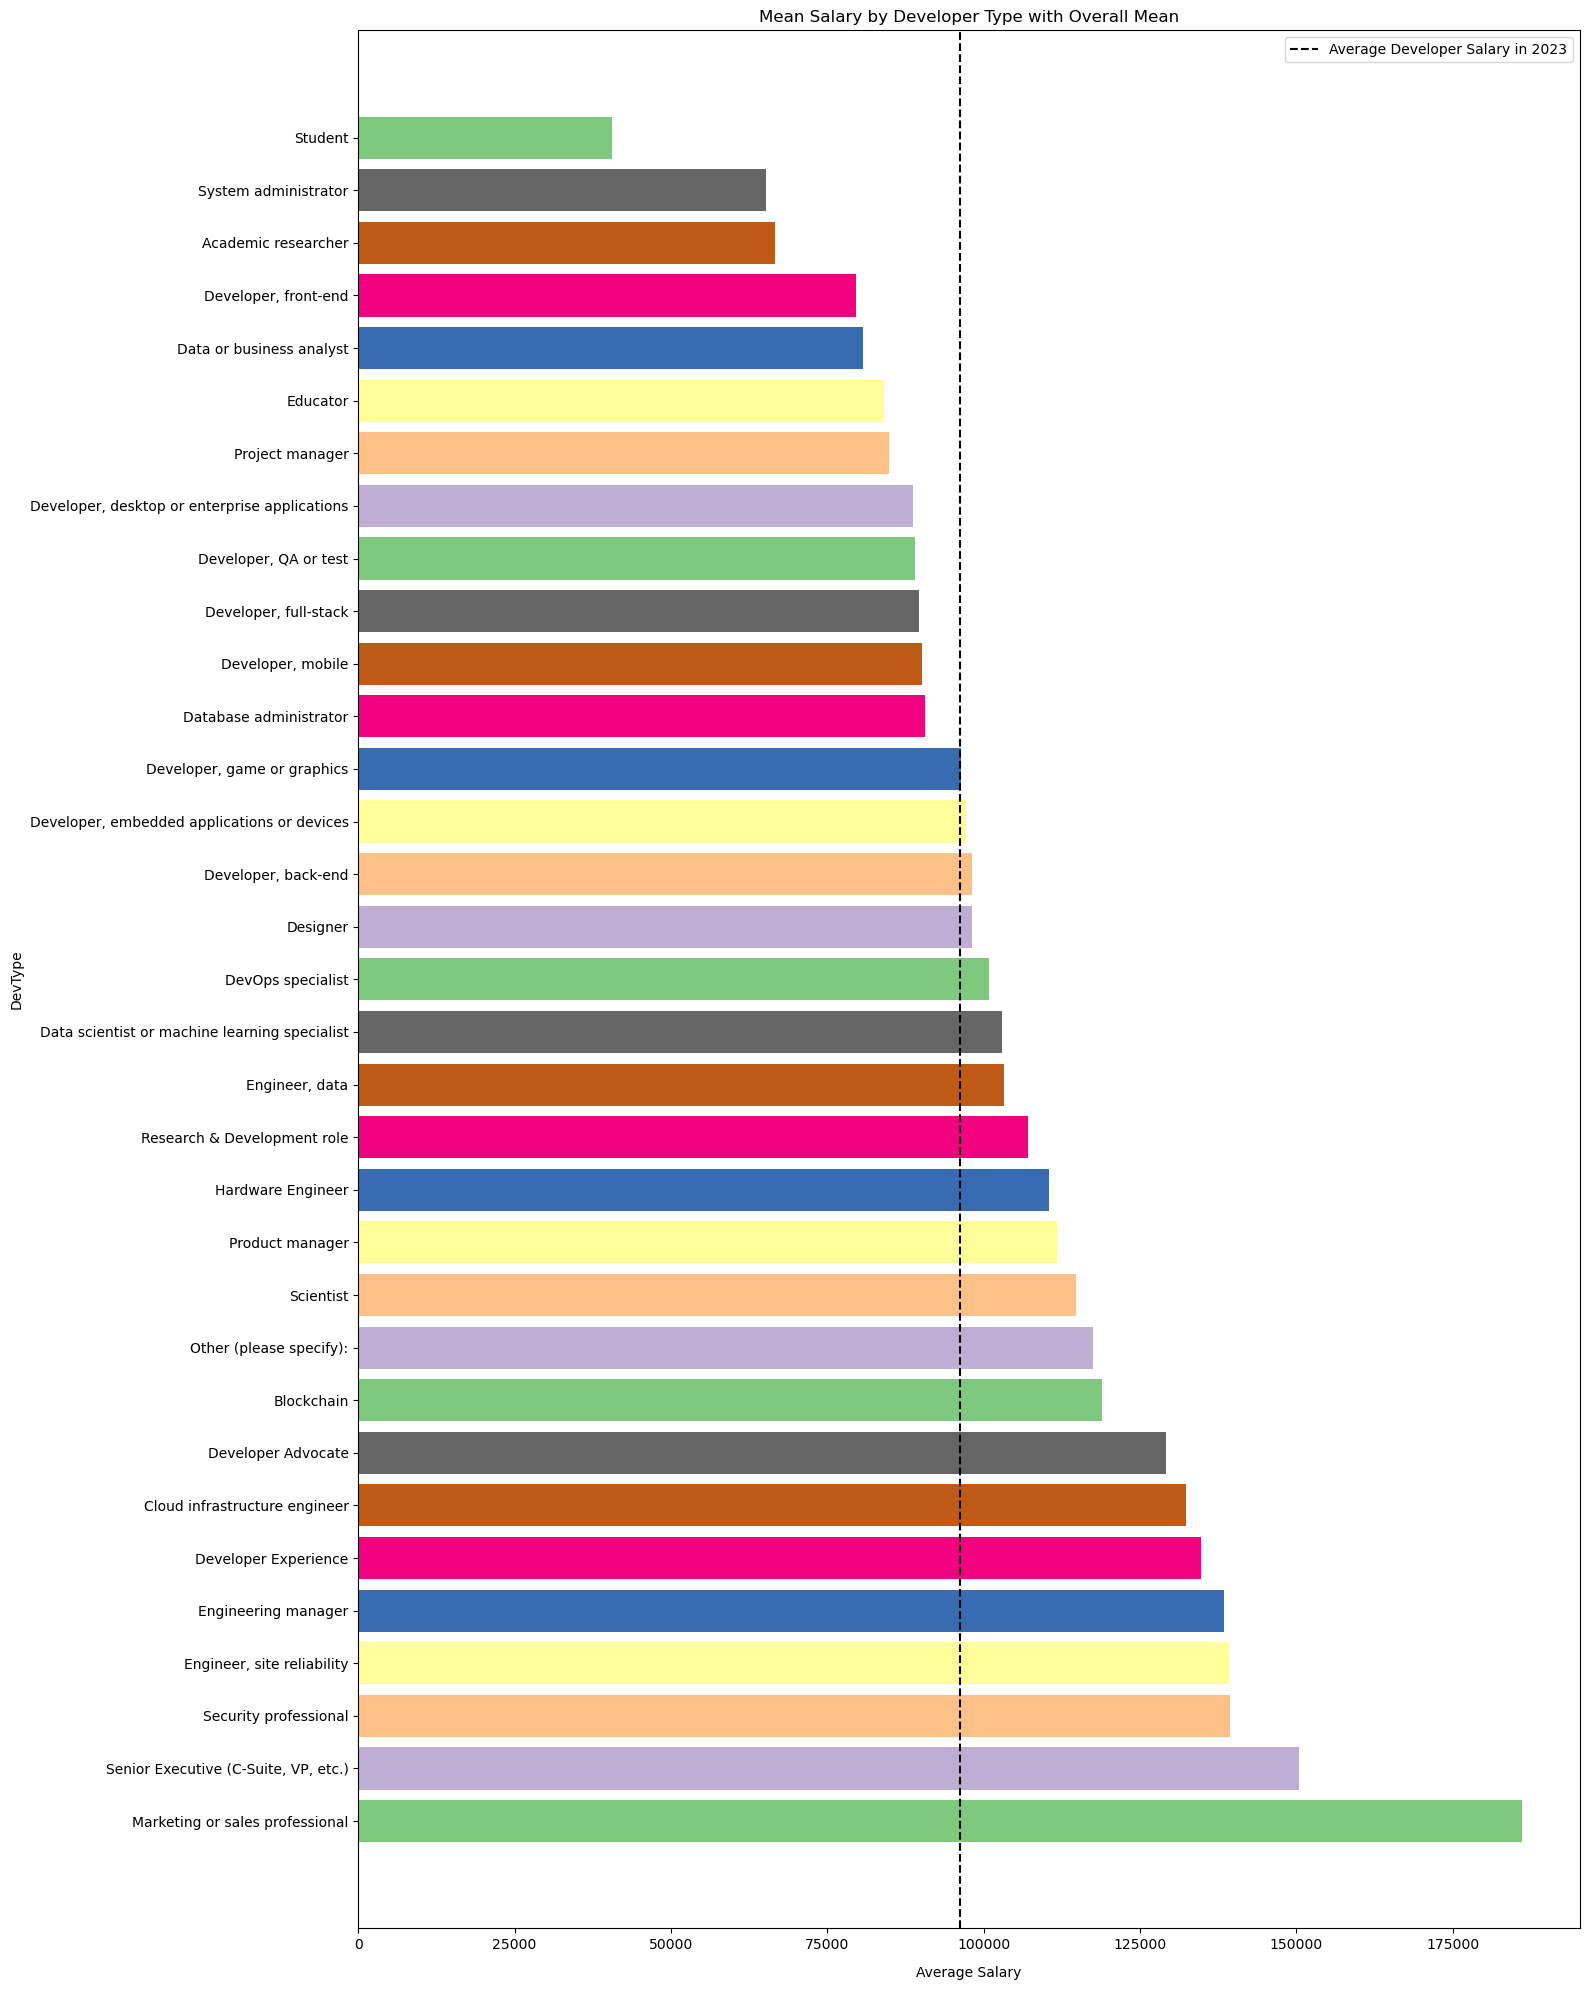

In [700]:
mean_salary = df["Salary"].mean()
filter_devtype = ~df['DevType'].isna() 
# Calculate mean salary for each country
mean_salary_by_devtype = df[filter_devtype].groupby("DevType")["Salary"].mean().sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(16, 20))
plt.barh(mean_salary_by_devtype.index, mean_salary_by_devtype, color=plt.cm.get_cmap("Accent").colors)

# Add a vertical line for the mean salary
plt.axvline(mean_salary, color="black", linestyle="--", label="Average Developer Salary in 2023")

# Customize the plot
plt.xlabel("Average Salary", labelpad=10)
plt.ylabel("DevType")
plt.title("Mean Salary by Developer Type with Overall Mean")
plt.legend()
plt.tight_layout()
plt.show()

In [644]:
# X = df.copy()
# y = X.pop("Salary")

# # Label encoding for categoricals
# for colname in X.select_dtypes("object"):
#     X[colname], _ = X[colname].factorize()

# # All discrete features should now have integer dtypes (double-check this before using MI!)
# discrete_features = X.dtypes == int

In [645]:
# from sklearn.feature_selection import mutual_info_regression

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[::3]  # show a few features with their MI scores

In [646]:
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores)

In [647]:
# plt.figure(figsize=(10, 25))

# devtype_colors = {
# "Fullstack Developer": "blue",
# "Backend Developer": "green",
# "Engineering manager": "orange",
# "Enterprise/Desktop Engineer": "purple",
# "Frontend Developer": "pink",
# "DevOps Engineer": "cyan",
# "Data Engineer": "gold",
# "Data Scientist": "magenta",
# "Cloud Engineer": "teal",
# "Mobile Developer": "brown",
# "Research & Development": "gray",
# "Embedded Systems Engineer": "darkorange",
# "Site Reliability Engineer": "black",
# "Security": "red",
# "Academic Researcher": "yellow",
# "Product Manager": "lime",
# "Project Manager": "olive",
# "QA Tester": "maroon",
# "Developer Experience": "navy",
# "Data Analyst": "aqua",
# "Game Developer": "coral",
# "System administrator": "indigo",
# "Developer Advocate": "maroon",
# "Blockchain Developer": "wheat",
# "Hardware Engineer": "darkgoldenrod",
# "Designer": "fuchsia",
# "Database Administrator": "darkolivegreen",
# }

# sns.scatterplot(x=df['Salary'], y=df['DevType'], c=[devtype_colors[x] for x in df['DevType']], alpha=0.7)
# plt.xlabel('Developer Type')
# plt.ylabel('Salary')
# # plt.xticks(rotation=90)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.xticks(rotation=90, ha="right")
# plt.tight_layout()

# plt.show()

In [648]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed'],
      dtype=object)

In [649]:
df.shape

(40560, 46)

In [650]:
# average_salary_country = df.groupby('Country')['Salary'].mean().reset_index()
# average_salary_country.head(40)

In [651]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x=df['Country'], y=df['Salary'], data=average_salary_country)
# plt.xlabel('Country')
# plt.ylabel('Average Salary')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [652]:
# average_salary_by_job = df.groupby('DevType')['Salary'].mean()
# average_salary_by_job.plot(kind='bar', figsize=(15, 5), title='Average Salary by Job', xlabel='Developer Type', ylabel='Average Salary ($)')
# plt.show()

In [653]:
# df.head()

In [654]:
# average_salary_by_edu= df.groupby('EdLevel')['Salary'].mean()
# average_salary_by_edu.plot(kind='bar', figsize=(10,6), title='Average Salary by Education Level', xlabel='Education Level', ylabel='Average Salarh')
# plt.show()

In [655]:
# df.head()

## Data Modelling

In [656]:
# dy= df.copy(deep=True)

In [657]:
# from sklearn.preprocessing import LabelEncoder

# le_remotework = LabelEncoder()
# df['RemoteWork']= le_remotework.fit_transform(df['RemoteWork'])

In [658]:
# le_edlevel = LabelEncoder()
# df['EdLevel']= le_edlevel.fit_transform(df['EdLevel'])


In [659]:
# le_country = LabelEncoder()
# df['Country']= le_country.fit_transform(df['Country'])


In [660]:
# le_devtype= LabelEncoder()
# df['DevType'] = le_devtype.fit_transform(df['DevType'])

In [661]:
# le_industry = LabelEncoder()
# df['Industry'] = le_industry.fit_transform(df['Industry'])

In [662]:
# df.head()

In [663]:
# df['EdLevel'].unique()

In [664]:
# df['Country'].unique()

In [665]:
# df['DevType'].unique()

In [666]:
# df.corr()

In [667]:
# df['YearsCodePro'].unique()

In [668]:
# from sklearn.linear_model import Lasso
# X= df.drop("Salary", axis=1).values
# y = df["Salary"].values

# names = df.drop("Salary", axis=1).columns
# lasso = Lasso(alpha=0.5)
# lasso_coef= lasso.fit(X, y).coef_
# plt.bar(names, lasso_coef)
# plt.xticks(rotation=45)
# plt.show()

In [669]:
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# #specify number of splits

# X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# print(np.mean(X_train), np.std(X_train))
# print(np.mean(X_train_scaled), np.std(X_train_scaled))

In [670]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import Ridge




# kf = KFold(n_splits=6, random_state=42, shuffle=True)
# lin_reg = LinearRegression()
#   # Perform cross-validation
# cv_scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=kf)
  
# print(np.mean(cv_scores))
# print(np.std(cv_scores))
# print(np.quantile(cv_scores, [0.025, 0.95]))

In [671]:
# scores = []
# for alpha in [0.01, 0.1, 10.0, 100.0, 1000.0]:
#     ridge = Ridge(alpha=alpha)
#     ridge.fit(X_train_scaled, y_train)
#     scores.append(ridge.score(X_test_scaled, y_test))

# print(scores)
# print(np.mean(scores))
# print(np.std(scores))
# print(np.quantile(scores, [0.025, 0.95]))

In [672]:
# lasso_scores = []
# for alpha in [0.01, 0.1, 10.0, 200.0, 500.0]:
#     lasso = Lasso(alpha=alpha)
#     lasso.fit(X_train_scaled, y_train)
#     lasso_scores.append(lasso.score(X_test_scaled, y_test))

# print(lasso_scores)
# print(np.mean(lasso_scores))
# print(np.std(lasso_scores))
# print(np.quantile(lasso_scores, [0.025, 0.95]))

In [673]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# # Create the parameter grid based on the results of random search
# params = {
#     'criterion': ['squared_error'],
#     'splitter': ['best'],
#     'max_depth': np.arange(10, 1000, 20),
#     'max_features': [5],
#     'random_state': [55]
# }
# tree = DecisionTreeRegressor()
# grid = GridSearchCV(tree, params, cv=kf)
# random = RandomizedSearchCV(tree, params, cv=kf)
# results = grid.fit(X_train_scaled, y_train)
# ran_results = random.fit(X_train_scaled, y_train)
# print(results.best_params_, results.best_score_)
# print('---------------------------------------------')
# print(ran_results.best_params_, ran_results.best_score_)


In [674]:
# grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': np.arange(2, 40, 2),
#     'random_state': [55],
#     'max_features': ['sqrt', 'log2']
# }

# model = RandomForestRegressor()
# rand_cv = RandomizedSearchCV(model, grid, cv=kf)
# cross_val = cross_val_score(model, X_train_scaled, y_train, cv=kf)
# rand_cv.fit(X_train_scaled, y_train)

# print(rand_cv.best_params_, rand_cv.best_score_)
# print('---------------------------------------------')
# print(np.mean(cross_val))

In [675]:
# test_y =np.array([['Remote','Bachelors degree', '5', 'Nigeria', 'Fullstack Developer']])
# test_y



In [676]:
# test_y[:, 0] = le_remotework.fit_transform(test_y[:, 0])
# test_y[:, 1] = le_edlevel.fit_transform(test_y[:, 1])
# test_y[:, 3] = le_country.fit_transform(test_y[:, 3])
# test_y[:, 4] = le_devtype.fit_transform(test_y[:, 4])


# test_y = test_y.astype(int)

# for name, model in models.items():
#     y_pred = model.predict(test_y)
#     print(f'{name} Prediction: {y_pred}')

In [677]:
# test_x = np.array([['Hybrid','Bachelors degree', '23', 'United States of America', 'Fullstack Developer']])
# test_x[:, 0] = le_remotework.fit_transform(test_x[:, 0])
# test_x[:, 1] = le_edlevel.fit_transform(test_x[:, 1])
# test_x[:, 3] = le_country.fit_transform(test_x[:, 3])
# test_x[:, 4] = le_devtype.fit_transform(test_x[:, 4])


# test_x = test_x.astype(int)

# for name, model in models.items():
#     y_pred = model.predict(test_x)
#     print(f'{name} Prediction: {y_pred}')